In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

import os
if not "milligrad" in os.listdir():
    os.chdir('..')

from milligrad import Tensor, Module, GD, topological_sort

from matplotlib import pyplot as plt

In [2]:
class MLP(Module):
    def __init__(self):
        self.w1 = Tensor.xavier(3, 20)
        self.w2 = Tensor.xavier(20, 2)
        self.b1 = Tensor.randn(20)
        self.b2 = Tensor.randn(2)
        
    def __call__(self, x):
        x = (x @ self.w1 + self.b1).relu()
        return (x @ self.w2 + self.b2)
    
    def parameters(self) -> list[Tensor]:
        return [self.w1, self.w2, self.b1, self.b2]

In [3]:


b = Tensor.randn(3)
w = Tensor.randn(2, 3)
x = Tensor.randn(5, 2)
y = (x @ w + b).relu()

# operations are recorded to perform backpropagation
# the order below is the order in which we bacpropagate
sorted_tensors = reversed(topological_sort(y))
[x._grad_fn for x in sorted_tensors if x._grad_fn] # "" is falsy

['relu', '+', '@']

In [12]:
from milligrad import Adam

x = Tensor.randn(20, 3)
y = Tensor.ones(20, 2)

model = MLP()
optim = Adam(model.parameters(), lr=1e-3)

losses = []
for i in range(10000):
    y_hat = model(x)
    loss = ((y - y_hat)**2).sum().sum()
    
    optim.zero_grad()
    loss.backward()
    optim.step()
        
    losses.append(loss.data)

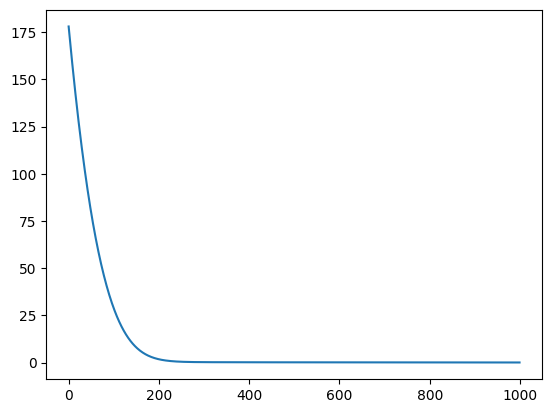

In [5]:
plt.plot(losses)

In [6]:
y_hat

Tensor([[0.9807737 , 0.98838405],
       [0.97631941, 0.98541211],
       [1.07412029, 1.12040828],
       [0.96625906, 0.97089246],
       [0.97360266, 0.99883177],
       [0.9889813 , 0.90797368],
       [0.92063834, 0.96095908],
       [1.06949582, 1.03900288],
       [0.97062576, 0.96508696],
       [1.01649182, 0.95265704],
       [1.08588094, 1.08233176],
       [0.95917686, 1.07772021],
       [0.97969948, 0.96980121],
       [1.0429894 , 1.00072341],
       [0.97796858, 1.05503805],
       [1.04363156, 0.9983662 ],
       [1.02131019, 0.98988742],
       [0.93608027, 0.96676136],
       [0.98818551, 0.92716002],
       [1.01875563, 1.01929231]], grad_fn=+)

In [10]:
x.grad

array([[-5.95864212e+02,  5.68501677e+02, -2.04630551e+02],
       [-4.26001496e+02,  3.24917421e+02,  4.40333297e-01],
       [-5.97532890e+02,  3.85845504e+02, -2.28983188e+02],
       [-6.02917834e+02,  4.78946158e+02, -2.22409021e+02],
       [-2.67310709e+02,  6.41118427e+01,  5.71410734e+01],
       [-1.50538228e+02,  6.40540340e+02,  1.47211429e+02],
       [-4.89732931e+02,  2.99801190e+01, -1.99862346e+02],
       [-4.93206632e+02,  2.36881295e+02, -4.97599742e+01],
       [-3.15411916e+02,  4.68419050e+02, -4.52013436e+01],
       [-2.14573877e+02,  1.99262311e+02, -4.82489889e+01],
       [-2.96000796e+02,  3.06501050e+02, -3.44223555e+02],
       [-3.19844621e+02,  6.38870995e+01, -6.55461166e+01],
       [-2.06614260e+02,  6.55884771e+02,  9.75776976e+01],
       [-3.10523019e+02,  4.50536811e+02, -5.25309855e+01],
       [-7.28126006e+02,  6.19482119e+02, -2.49494875e+02],
       [-2.31098315e+02,  3.03947952e+02, -2.23386844e+01],
       [-1.44069371e+02,  2.25980974e+02

In [7]:
# example of using no_grad
with Tensor.no_grad():
    y_hat = model(x)
    y_hat.backward()

AssertionError: No gradient tracking when in no_grad mode